In [1]:
import anndata
import scvelo as scv
import csv
import gzip
import os
import re
import scipy.io
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pylab as plt
from matplotlib import cm
from colorspacious import cspace_converter
from collections import OrderedDict
ast_note_interactivity = "all"

root_folder_velo = "D:/Raw_data_LSCB/scRNAseqMehmet/velocyto"
root_folder_counts = "D:/Raw_data_LSCB/scRNAseqMehmet/RawCounts"

cmaps = OrderedDict()
scv.settings.set_figure_params('scvelo')
sc.settings.verbosity = 3
results_file = "./scvelo_adata"
backup_not_created = True
tmp = os.listdir(root_folder_counts)
filt=["_rep" in x and "spike" not in x for x in tmp]
datasets=[i for (i, v) in zip(tmp, filt) if v]
print(datasets)

C:\Users\nicki\AppData\Roaming\Python\Python37\site-packages\anndata\_core\anndata.py:21: FutureWarning: pandas.core.index is deprecated and will be removed in a future version.  The public classes are available in the top-level namespace.
  from pandas.core.index import RangeIndex


['0pc_D5_rep1', '0pc_D5_rep2', '0pc_D6_rep1', '0pc_D6_rep2', '0pc_D7_rep1', '0pc_D7_rep2', '0pc_D8_rep1', '0pc_D8_rep2', '3pc_D5_rep1', '3pc_D5_rep2', '3pc_D6_rep1', '3pc_D6_rep2', '3pc_D7_rep1', '3pc_D7_rep2', '3pc_D8_rep1', '3pc_D8_rep2']


In [2]:
first = True
for dataset in datasets:
    tmp = sc.read_10x_mtx(os.path.join(root_folder_counts,dataset),var_names='gene_symbols',cache=True)
    tmp2 = scv.read(os.path.join(root_folder_velo,dataset+".loom"), cache=True)
    tmp2.var_names_make_unique()
    tmp = scv.utils.merge(tmp,tmp2)
    tmp.obs["Dataset"] = dataset
    if first:
        adata = tmp
        first = False
    else:
        adata = tmp.concatenate(adata,batch_key='batch') # I would like to do ,join='outer' to keep all genes, but err: layers concatenation not yet available and will be ignored

... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D5_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D5_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D5_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D5_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D6_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D6_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D6_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D6_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D7_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D7_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D7_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D7_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D8_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D8_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-0pc_D8_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-0pc_D8_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D5_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D5_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D5_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D5_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D6_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D6_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D6_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D6_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D7_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D7_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D7_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D7_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D8_rep1-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D8_rep1.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-RawCounts-3pc_D8_rep2-matrix.h5ad
... reading from cache file cache\D-Raw_data_LSCB-scRNAseqMehmet-velocyto-3pc_D8_rep2.h5ad


Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [3]:
tmp2.layers["spliced"]

<4441x32285 sparse matrix of type '<class 'numpy.uint16'>'
	with 17011138 stored elements in Compressed Sparse Row format>

In [4]:
adata

AnnData object with n_obs × n_vars = 63069 × 29836 
    obs: 'Clusters', 'Dataset', '_X', '_Y', 'batch', 'initial_size', 'initial_size_spliced', 'initial_size_unspliced'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [5]:
# Cleanup the duplicated gene annotations (if needed)
#adata.var = adata.var[['gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand']]

In [6]:
# Add the dataset name as a prefix to cell names and remove the strings of numbers from the merging:
adata.obs.index = adata.obs.Dataset + "_" + list(adata.obs.index)
adata.obs.index = [x.split("-")[0] for x in adata.obs.index]

In [7]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 929 cells that have less than 200 genes expressed
filtered out 6591 genes that are detected in less than 3 cells


In [8]:
mito_genes = adata.var_names.str.startswith('mt-')
# for each cell compute fraction of counts in mito genes vs. all genes
# the `.A1` is only necessary as X is sparse (to transform to a dense array after summing)
adata.obs['percent_mito'] = np.sum(adata[:, mito_genes].X, axis=1).A1 / np.sum(adata.X, axis=1).A1
# add the total counts per cell as observations-annotation to adata
adata.obs['n_counts'] = adata.X.sum(axis=1).A1

... storing 'Dataset' as categorical
... storing 'feature_types' as categorical


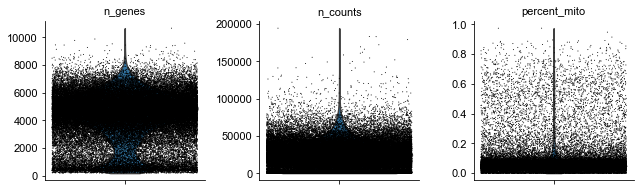

In [9]:
sc.pl.violin(adata, ['n_genes', 'n_counts', 'percent_mito'],jitter=0.4, multi_panel=True)

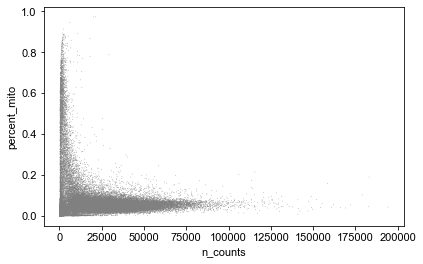

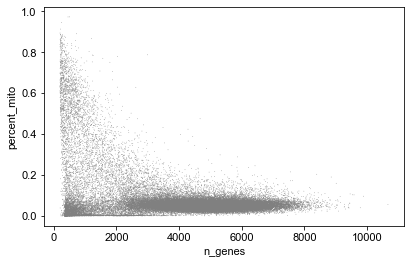

In [10]:
sc.pl.scatter(adata, x='n_counts', y='percent_mito')
sc.pl.scatter(adata, x='n_genes', y='percent_mito')

In [11]:
adata = adata[adata.obs.n_genes > 2000, :]
adata = adata[(adata.obs.percent_mito < 0.15) & (adata.obs.percent_mito > 0.015), :]

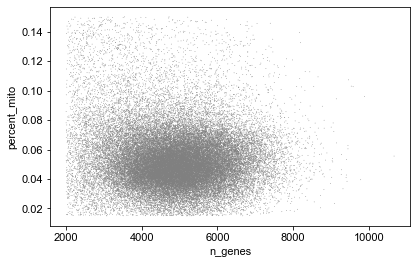

In [12]:
sc.pl.scatter(adata, x='n_genes', y='percent_mito')

In [13]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:01)


In [14]:
sc.pp.log1p(adata)

In [15]:
# To explore several close-ups without reloading the data, can create a backup
if backup_not_created:
    adata_backup = adata
    adata_backup.uns["Backup"] = True # Make a modification to instantiate the copy. 
    backup_not_created = False

In [137]:
# This is to restore the backup and then explore another close-up (switch to True to execute)
if True:
    adata = adata_backup
    adata.uns["Backup"] = False # Make a modification to instantiate the copy. 

In [138]:
adata

AnnData object with n_obs × n_vars = 51426 × 23245 
    obs: 'Clusters', 'Dataset', '_X', '_Y', 'batch', 'initial_size', 'initial_size_spliced', 'initial_size_unspliced', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    uns: 'log1p', 'Backup'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [139]:
adata.obs

Clusters      Dataset         _X         _Y  \
3pc_D8_rep2_AAACCCACAGGTTTAC         5  3pc_D8_rep2 -14.760717  -2.843863   
3pc_D8_rep2_AAACCCAGTCGAAACG         0  3pc_D8_rep2  -8.261430   9.744514   
3pc_D8_rep2_AAACCCATCTAATTCC         0  3pc_D8_rep2 -26.640484  23.232407   
3pc_D8_rep2_AAACGAACACCAGCGT         2  3pc_D8_rep2  -6.585487 -31.894802   
3pc_D8_rep2_AAACGAAGTCATTGCA         2  3pc_D8_rep2 -19.685532 -28.100554   
...                                ...          ...        ...        ...   
0pc_D5_rep1_TTTGGTTGTGGATGAC         0  0pc_D5_rep1  -4.100165  26.534199   
0pc_D5_rep1_TTTGGTTTCCGTATGA         0  0pc_D5_rep1   7.282642  23.468533   
0pc_D5_rep1_TTTGTTGAGCAGCAGT         0  0pc_D5_rep1 -10.295600  24.205002   
0pc_D5_rep1_TTTGTTGCATTGCCGG         0  0pc_D5_rep1 -12.268735  17.060495   
0pc_D5_rep1_TTTGTTGTCTCATTTG         5  0pc_D5_rep1 -29.637482  11.276786   

                             batch  initial_size  initial_size_spliced  \
3pc_D8_rep2_AAACCCACAGGTTTAC     0       12839.0                 12839   
3pc_D8_rep2_AAACCCAGTCGAAACG     0       14822.0                 14822   
3pc_D8_rep2_AAACCCATCTAATTCC     0       13135.0                 13135   
3pc_D8_rep2_AAACGAACACCAGCGT     0       12595.0                 12595   
3pc_D8_rep2_AAACGAAGTCATTGCA     0        7519.0                  7519   
...                            ...           ...                   ...   
0pc_D5_rep1_TTTGGTTGTGGATGAC     1       11567.0                 11567   
0pc_D5_rep1_TTTGGTTTCCGTATGA     1       21131.0                 21131   
0pc_D5_rep1_TTTGTTGAGCAGCAGT     1       13232.0                 13232   
0pc_D5_rep1_TTTGTTGCATTGCCGG     1       18856.0                 18856   
0pc_D5_rep1_TTTGTTGTCTCATTTG     1       17845.0                 17845   

                              initial_size_unspliced  n_genes  percent_mito  \
3pc_D8_rep2_AAACCCACAGGTTTAC                    4529     4738      0.077440   
3pc_D8_rep2_AAACCCAGTCGAAACG                    4508     4633      0.041926   
3pc_D8_rep2_AAACCCATCTAATTCC                    2732     4341      0.072231   
3pc_D8_rep2_AAACGAACACCAGCGT                    2371     4049      0.056616   
3pc_D8_rep2_AAACGAAGTCATTGCA                   10778     3975      0.144214   
...                                              ...      ...           ...   
0pc_D5_rep1_TTTGGTTGTGGATGAC                    1696     3502      0.015404   
0pc_D5_rep1_TTTGGTTTCCGTATGA                    5423     5377      0.043407   
0pc_D5_rep1_TTTGTTGAGCAGCAGT                    2217     3798      0.054616   
0pc_D5_rep1_TTTGTTGCATTGCCGG                    4852     4943      0.045724   
0pc_D5_rep1_TTTGTTGTCTCATTTG                    4111     5012      0.041771   

                              n_counts  
3pc_D8_rep2_AAACCCACAGGTTTAC   17562.0  
3pc_D8_rep2_AAACCCAGTCGAAACG   20417.0  
3pc_D8_rep2_AAACCCATCTAATTCC   18524.0  
3pc_D8_rep2_AAACGAACACCAGCGT   17610.0  
3pc_D8_rep2_AAACGAAGTCATTGCA   12849.0  
...                                ...  
0pc_D5_rep1_TTTGGTTGTGGATGAC   18112.0  
0pc_D5_rep1_TTTGGTTTCCGTATGA   34280.0  
0pc_D5_rep1_TTTGTTGAGCAGCAGT   21880.0  
0pc_D5_rep1_TTTGTTGCATTGCCGG   30312.0  
0pc_D5_rep1_TTTGTTGTCTCATTTG   28704.0  

[51426 rows x 11 columns]

In [140]:
os.getcwd()

'C:\\Users\\nicki\\Documents\\PostDoc_LSCB\\20-05-30_Mehmet_Brain_Gastruloids\\20-07-16_Analysis1_mergeAllDatasets'

In [141]:
closeup_name = "Extraembryonic" # choose one among "Overview","Mesendoderm","Ectoderm","Extraembryonic","Neurons"
metadata = pd.read_csv("./OutputTables/"+closeup_name+"_metadata.tsv",sep="\t")
metadata.rename(columns={'Unnamed: 0':'cell_name'},inplace=True)
metadata.index=metadata["cell_name"]
metadata=metadata.drop(['orig.ident','nCount_RNA','nFeature_RNA','percent.mito','cell_name'], axis=1)
varfeats = pd.read_csv("./OutputTables/"+closeup_name+"_varfeats.tsv",sep='\n',header=None, names=["varfeats"])
DR = pd.read_csv("./OutputTables/"+closeup_name+"_DR.tsv",sep="\t",index_col=0)

In [142]:
cells_py = set(adata.obs_names)
cells_R  = set(metadata.index)

if len(cells_py)==len(cells_R & cells_py):
    print("All the "+str(len(cells_py))+" cells in the python adata object were described in the metadata imported.")
else:
    print("The python adata object has "+str(len(cells_py))+" cells, the metadata loaded describes "+str(len(cells_R & cells_py))+" of them")

print("Gastruloids had "+str(len([x for x in list(metadata.index) if "_rep" in x]))+" cells in Seurat.") # Expect a handful of cells lost because velocyto is starting from the cellranger pre-filtered data. Does not have any meaningful consequences.

# Importantly, I have included doublet removal as part of the Seurat workflow, so Seurat is missing a few cells that were present in the anndata. 
# So need to restrict to the intersection of cells (only losing a few cells, without consequences):
cells_keep = list(set(cells_py) & set(cells_R))
adata = adata[cells_keep,:]

The python adata object has 51426 cells, the metadata loaded describes 2107 of them
Gastruloids had 2115 cells in Seurat.


In [143]:
adata.raw = adata
adata

AnnData object with n_obs × n_vars = 2107 × 23245 
    obs: 'Clusters', 'Dataset', '_X', '_Y', 'batch', 'initial_size', 'initial_size_spliced', 'initial_size_unspliced', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells'
    uns: 'log1p', 'Backup'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [144]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


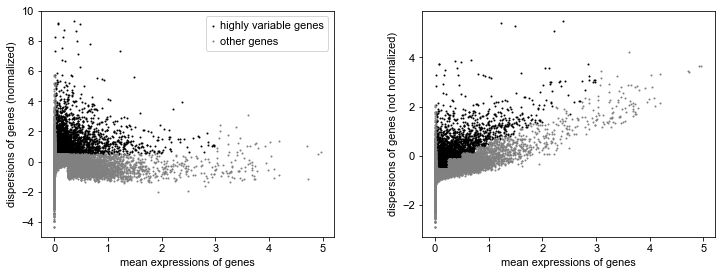

In [145]:
sc.pl.highly_variable_genes(adata)

In [146]:
adata = adata[:, adata.var.highly_variable]
adata

View of AnnData object with n_obs × n_vars = 2107 × 3255 
    obs: 'Clusters', 'Dataset', '_X', '_Y', 'batch', 'initial_size', 'initial_size_spliced', 'initial_size_unspliced', 'n_genes', 'percent_mito', 'n_counts'
    var: 'gene_ids', 'feature_types', 'Accession', 'Chromosome', 'End', 'Start', 'Strand', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'Backup'
    layers: 'ambiguous', 'matrix', 'spliced', 'unspliced'

In [147]:
sc.pp.scale(adata, max_value=None, zero_center=False)

In [148]:
metadata = metadata.loc[adata.obs_names,:]
UMAP = DR.loc[adata.obs_names,[x for x in DR.columns.tolist() if "UMAP" in x]]
harmony = DR.loc[adata.obs_names,[x for x in DR.columns.tolist() if "harmony" in x]]

In [149]:
adata.obsm['X_umap'] = UMAP.to_numpy(dtype="float32")

In [150]:
adata.obsm['X_harmony'] = harmony.to_numpy(dtype="float32")

In [151]:
adata.obs = adata.obs.drop(labels=["Clusters","_X","_Y"],axis=1)
adata.obs = adata.obs.drop(labels=list(set(adata.obs.columns) & set(metadata.columns)),axis=1)
adata.obs = pd.concat([adata.obs[:], metadata[:]],axis=1)

... storing 'Dataset' as categorical
... storing 'Stage' as categorical
... storing 'Batch' as categorical
... storing 'Epithelialized' as categorical
... storing 'celltype' as categorical
... storing 'GermLayer' as categorical
... storing 'pijuansala_scmap_celltype' as categorical


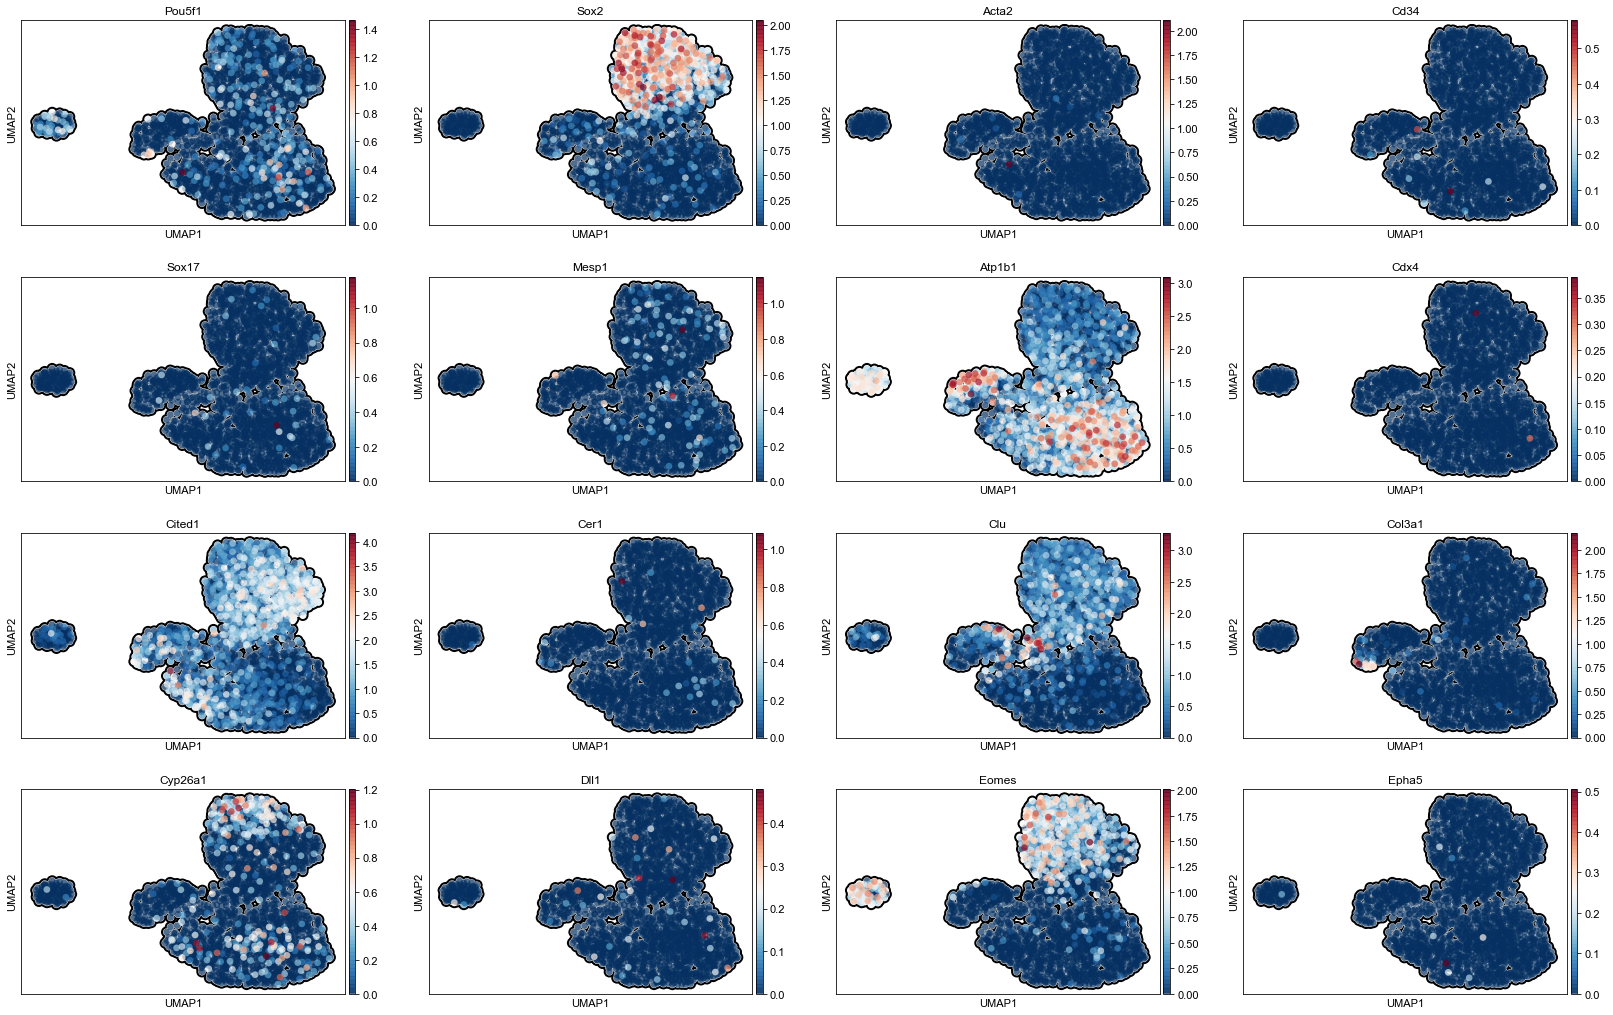

In [152]:
sc.pl.umap(adata, color=["Pou5f1","Sox2","Acta2","Cd34","Sox17","Mesp1","Atp1b1","Cdx4","Cited1","Cer1","Clu","Col3a1","Cyp26a1","Dll1","Eomes","Epha5"], size = 180, use_raw=True, add_outline = True, save="CellTypeMarkers.png")

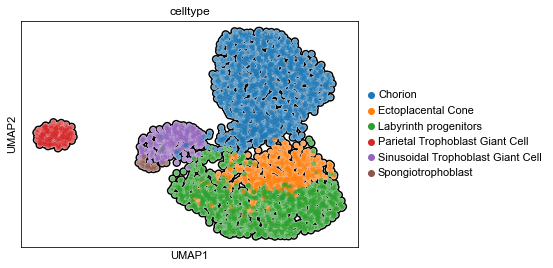

Index(['Chorion', 'Ectoplacental Cone', 'Labyrinth progenitors',
       'Parietal Trophoblast Giant Cell', 'Sinusoidal Trophoblast Giant Cell',
       'Spongiotrophoblast'],
      dtype='object')

In [153]:
ident = 'celltype' # Reasonable choices louvain_clusters or celltype
sc.pl.umap(adata, color=['celltype'], add_outline = True ,size=100) # Need to make a umap or celltype is not categorical and next line crashes. 
adata.obs['celltype'].cat.categories

In [154]:
adata.uns["Day_colors"] = ['#6165fb','#f854ee','#f85454','#f8ea54']
cluster_colors = pd.read_csv("./InputTables/ClusterColors.tsv",sep="\t",index_col=False,header=0,)
cluster_colors.head()

color                           celltype
0  #f8e16c                            Chorion
1  #ffa303                 Ectoplacental Cone
2  #d3b942              Labyrinth progenitors
3  #b58f34  Sinusoidal Trophoblast Giant Cell
4  #d8992b    Parietal Trophoblast Giant Cell

In [155]:
tmp = {cluster_colors.loc[i,"celltype"]:cluster_colors.loc[i,"color"] for i in range(0,cluster_colors.shape[0]) if cluster_colors.loc[i,"celltype"]==cluster_colors.loc[i,"celltype"]}
adata.uns["celltype_colors"] = [tmp[i] for i in adata.obs['celltype'].cat.categories[:].values]

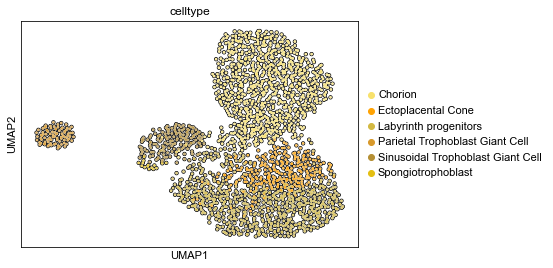

In [156]:
sc.pl.umap(adata, color=['celltype'], add_outline = True ,size=25,save="CellTypes.pdf")

In [159]:
velo_mode = "deterministic" #stochastic, deterministic, dynamical
if velo_mode == "dynamical":
    scv.tl.recover_dynamics(adata)
scv.tl.velocity(adata, mode=velo_mode, enforce=True)

Normalized count data: spliced, unspliced.
computing PCA
    on highly variable genes
    with n_comps=30
    finished (0:00:02)
computing neighbors
    finished (0:00:02) --> added 
    'distances' and 'connectivities', weighted adjacency matrices (adata.obsp)
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of spliced/unspliced abundances (adata.layers)
computing velocities
    finished (0:00:00) --> added 
    'velocity', velocity vectors for each individual cell (adata.layers)


In [160]:
scv.tl.velocity_graph(adata)

computing velocity graph
    finished (0:00:23) --> added 
    'velocity_graph', sparse matrix with cosine correlations (adata.uns)


In [161]:
print(adata.uns['velocity_graph'][1:10,1:10])

  (0, 1)	0.09648096
  (0, 6)	0.049113754
  (1, 0)	0.18646175
  (2, 0)	0.08933493
  (2, 1)	0.07597693
  (2, 6)	0.16322096
  (6, 2)	0.17607197
  (8, 0)	0.08149831


computing velocity embedding
    finished (0:00:00) --> added
    'velocity_umap', embedded velocity vectors (adata.obsm)
saving figure to file ./figures/scvelo_Velocity_deterministic_Day.png


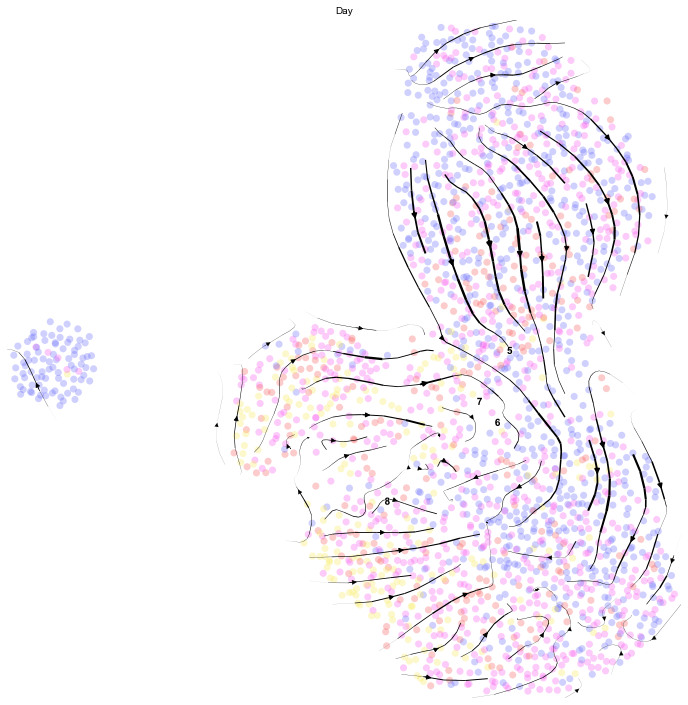

In [162]:
ident = "Day" # celltype or Day or other
filetype = "png" # png or svg (convert to pdf with illustrator to bypass a bug)
# Original version: density 1.5, cutoff 0.2
# Data more or less making sense at density 1 cutoff 25
# Kept density 1 cutoff 22 for mesendoderm
# Kept density 1 cutoff 2 for ectoderm
# Kept density 1 cutoff 0 for neurons
# Kept density 1 cutoff 5 for overview
scv.pl.velocity_embedding_stream(adata, basis='umap',figsize=(12,12), size = 200, density=0.5, color=ident,cutoff_perc=5,linewidth=1.5,save="Velocity_"+velo_mode+"_"+ident+"."+filetype) 

saving figure to file ./figures/scvelo_Velocity_deterministic_arrows_celltype.png


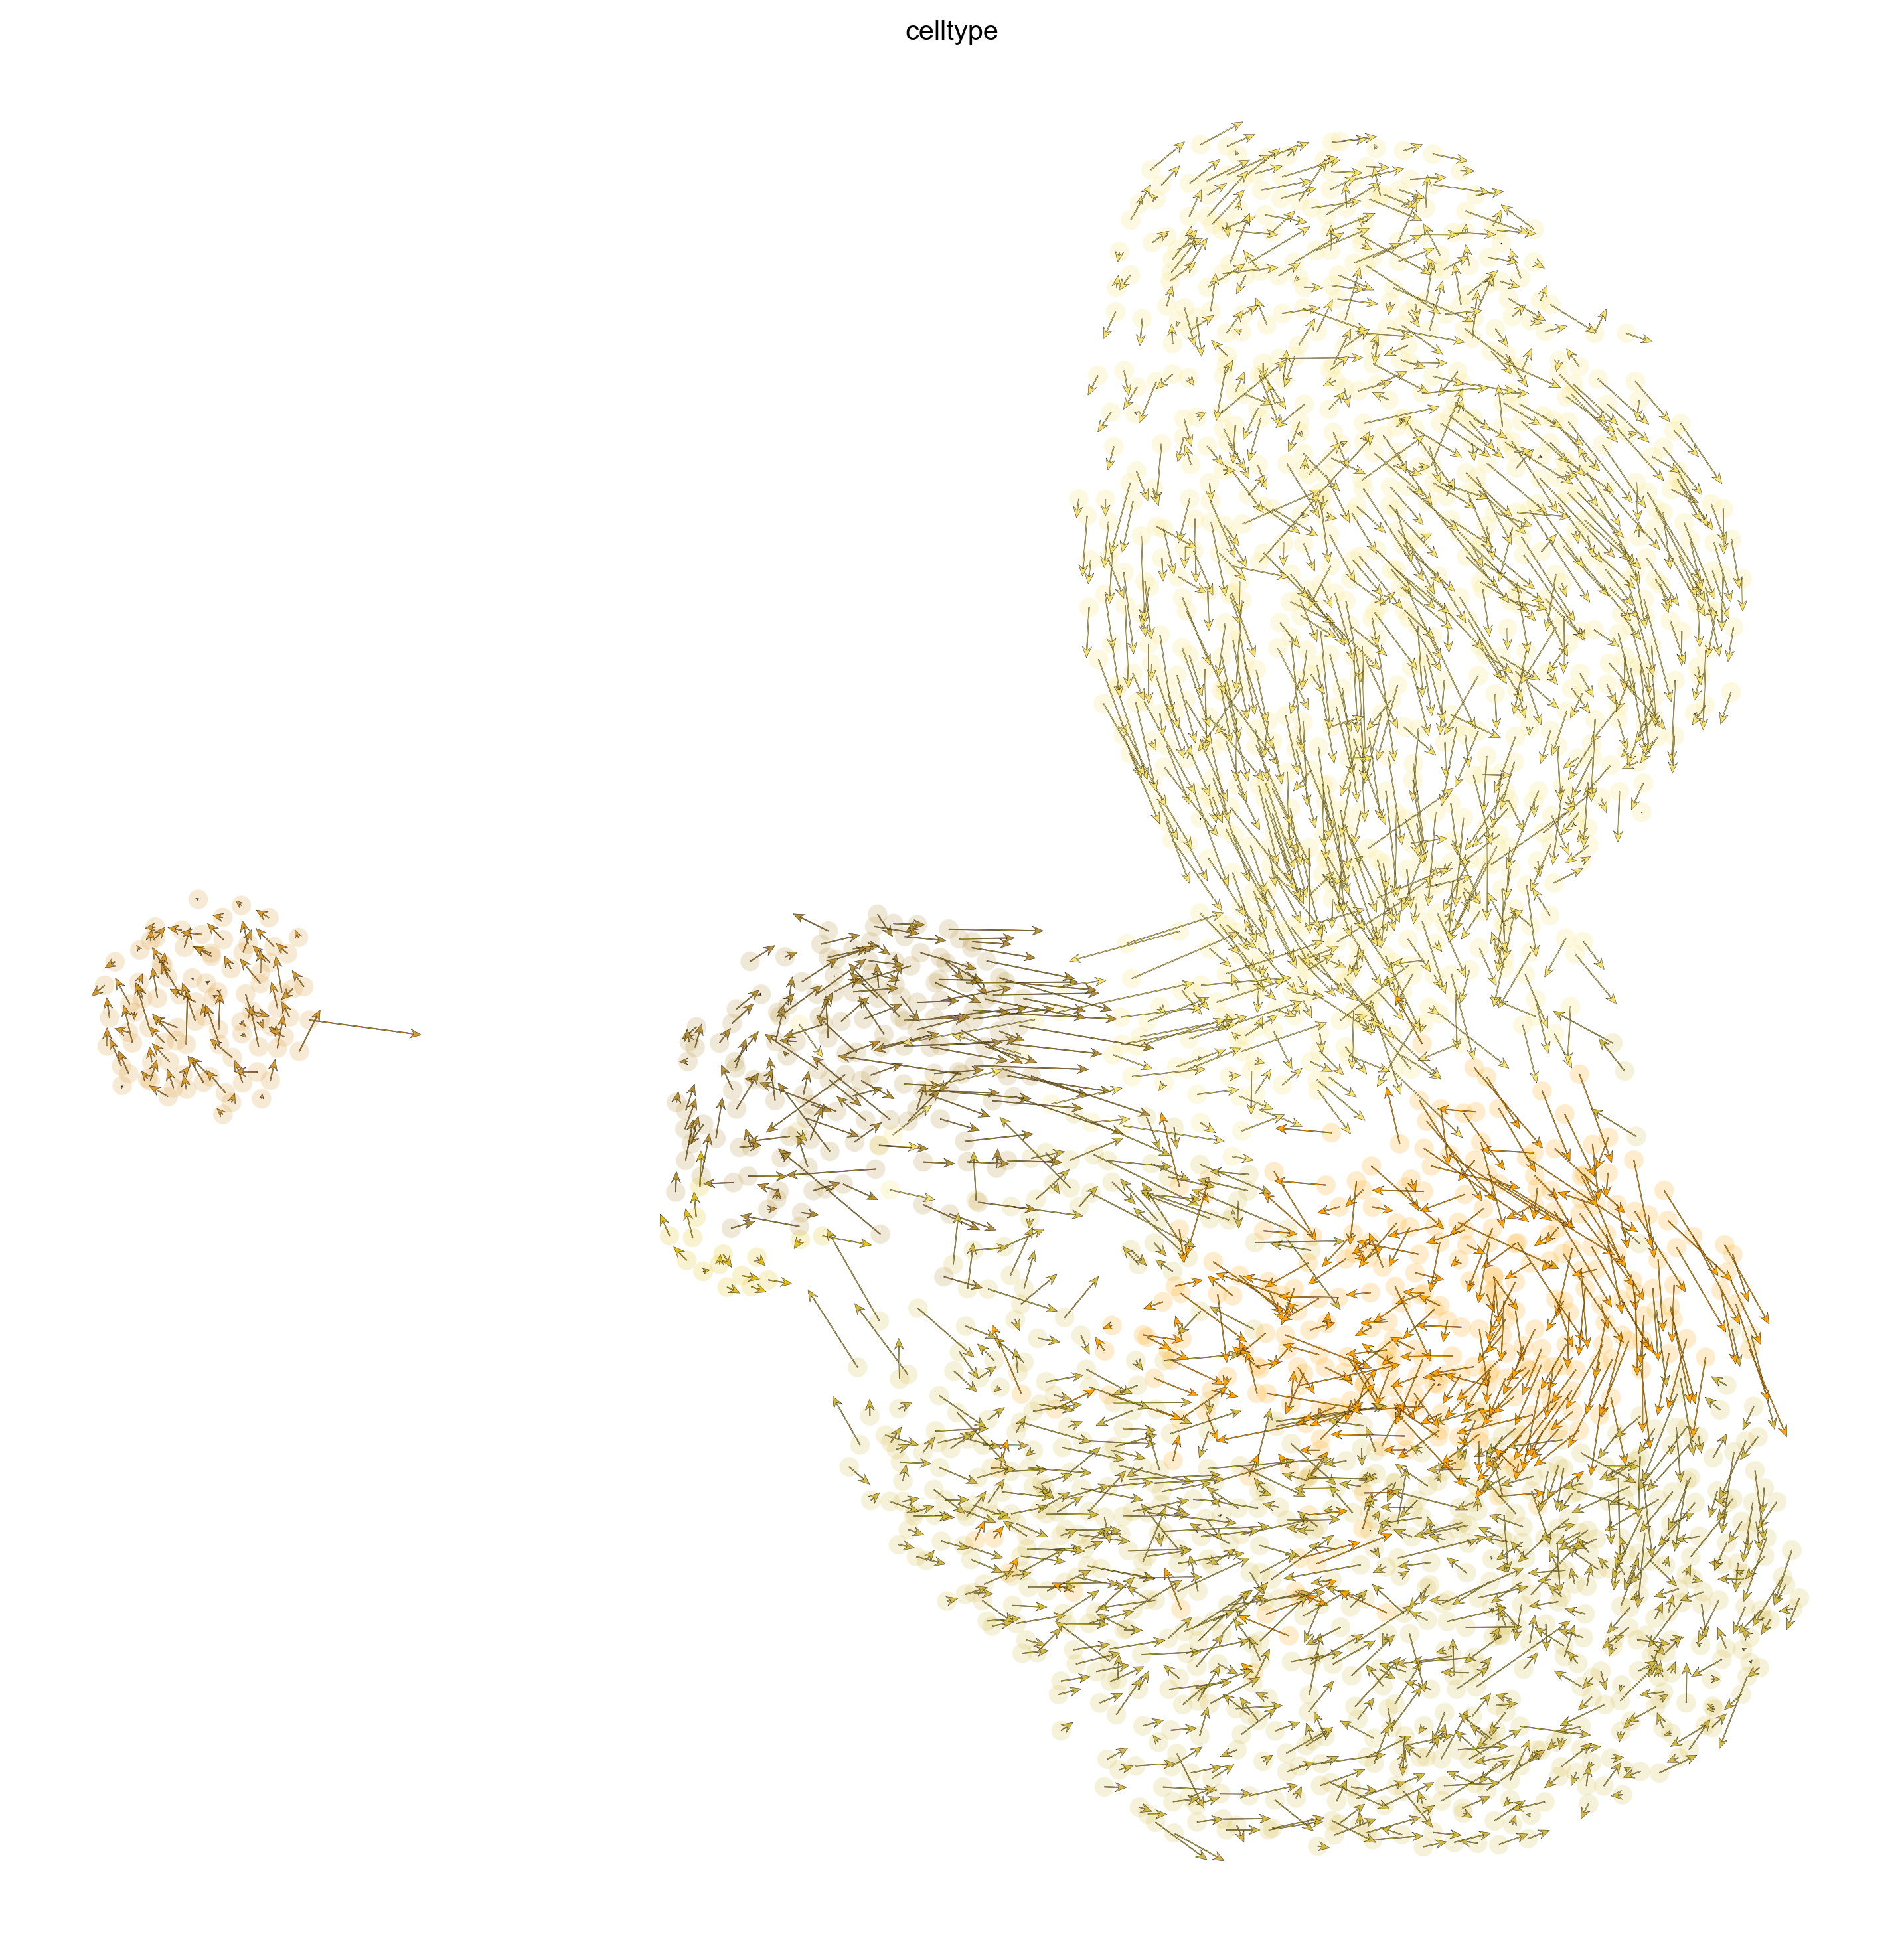

In [163]:
ident = "celltype" # celltype or stage
scv.pl.velocity_embedding(adata, arrow_length=8.3, arrow_size=1, figsize=(12,12), size = 200, color=ident, dpi=300,save="Velocity_"+velo_mode+"_arrows_"+ident+".png")

saving figure to file ./figures/scvelo_Velocity_deterministic_grid_celltype.svg


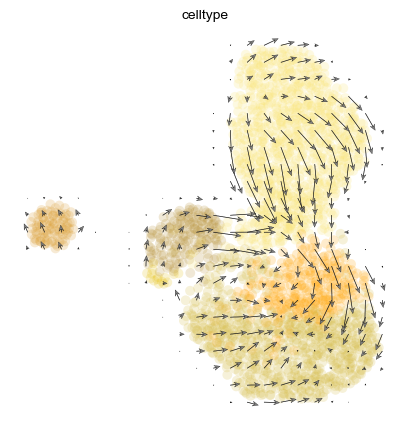

In [164]:
ident = "celltype" # celltype or stage
scv.pl.velocity_embedding_grid(adata, density =0.45, arrow_length=4, arrow_size=2.5, figsize=(5,5), size = 200, color=ident, dpi=100,save="Velocity_"+velo_mode+"_grid_"+ident+".svg")

--> added 'velocity_length' (adata.obs)
--> added 'velocity_confidence' (adata.obs)
--> added 'velocity_confidence_transition' (adata.obs)


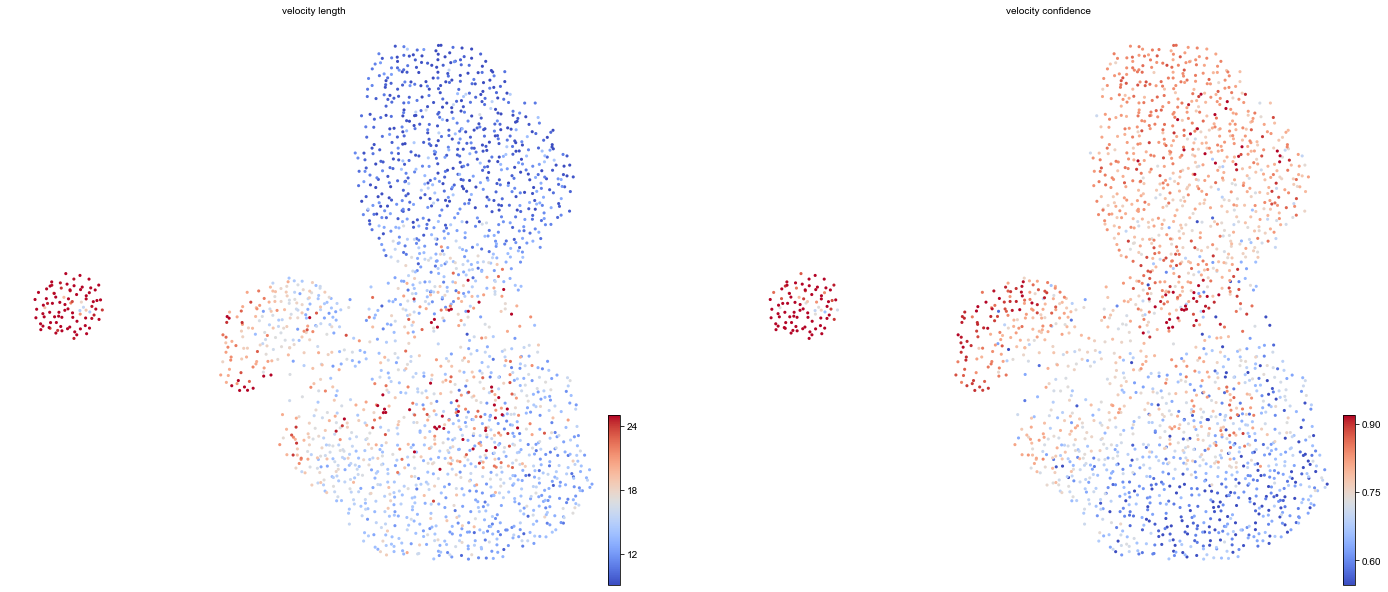

In [165]:
scv.tl.velocity_confidence(adata)
keys = 'velocity_length', 'velocity_confidence'
scv.pl.scatter(adata, c=keys, cmap='coolwarm', perc=[5, 95],figsize=(12,10))

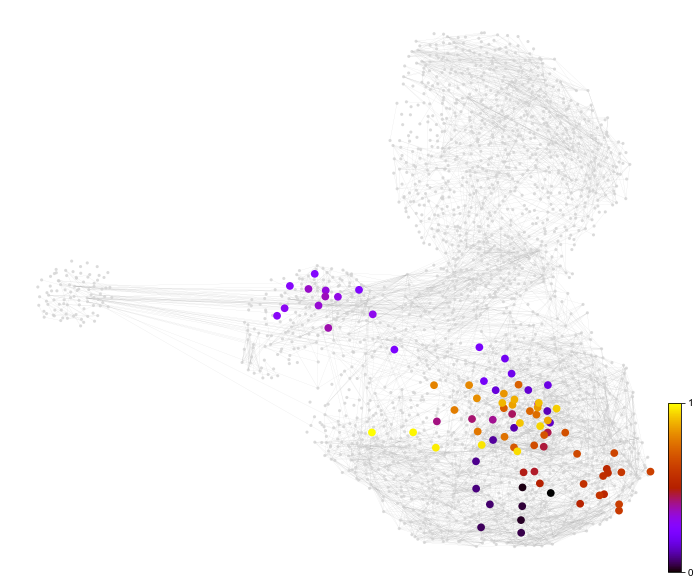

In [166]:
x, y = scv.utils.get_cell_transitions(adata, basis='umap', starting_cell=1000)
ax = scv.pl.velocity_graph(adata, c='lightgrey', edge_width=.05, show=False, figsize=(12,10),threshold=.1)
ax = scv.pl.scatter(adata, x=x, y=y, s=240, c='descending', cmap='gnuplot', ax=ax)

In [167]:
tmp = scv.utils.get_transition_matrix(adata,scale=1,use_negative_cosines=True,self_transitions=False)
scipy.io.mmwrite("OutputTables/transition_matrix", tmp, comment='', field=None, precision=None, symmetry=None)

In [168]:
adata.obs.to_csv("OutputTables/ScVelo_CellMetadata.csv")

ValueError: color key is invalid! pass valid observation annotation or a gene name

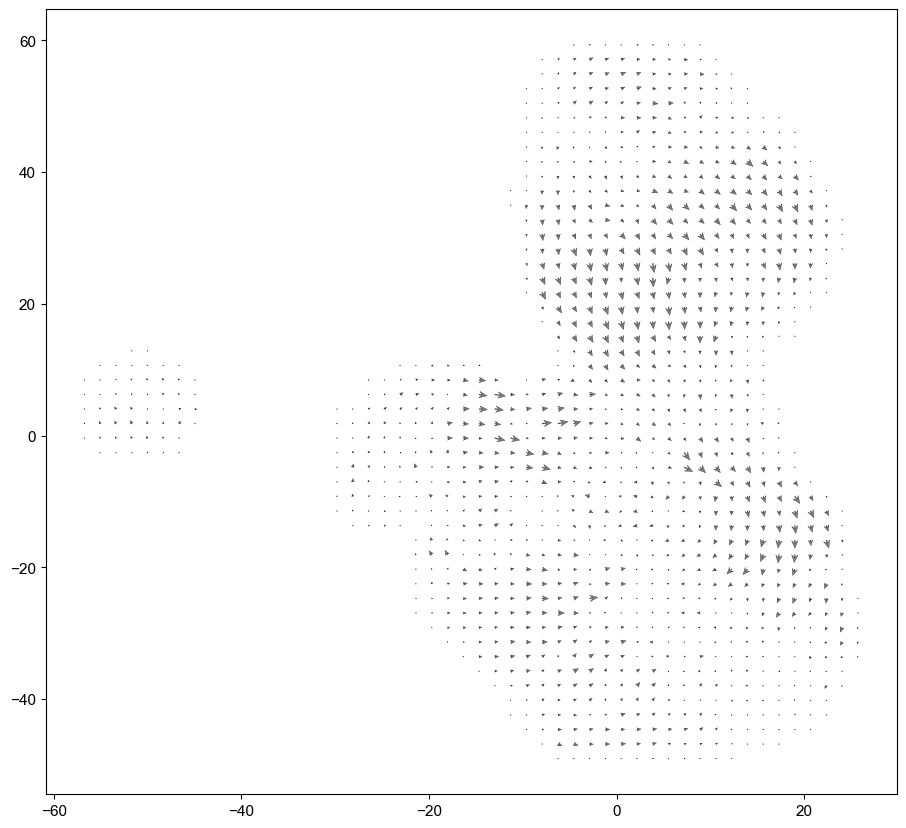

In [169]:
scv.pl.velocity_embedding_grid(adata, color='En1',layer=['velocity', 'spliced'], arrow_size=1.5,size=200,dpi=100,figsize=(12,10))